# Creating combined datasets for failed models in other script

In [1]:
import xarray as xr
import os
import numpy as np
import functions.eddy_feedback as ef
import functions.data_wrangling as dw

import warnings
warnings.filterwarnings("ignore", category=xr.SerializationWarning)

In [3]:
path = '/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC'
variables = ['ua', 'epfy']
models = ['CESM1-WACCM-SC', 'CNRM-CM6-1', 'EC-EARTH3', 'IPSL-CM6A-LR', 'OpenIFS-159']

# CNRM-CM6-1

In [ ]:
# cnrm_ua = xr.open_mfdataset(
#     '/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC/ua/CNRM-CM6-1/*.nc',
#     chunks={'time': 31},
#     combine='nested',
#     concat_dim='ens_ax'
#     )

# cnrm_epfy = xr.open_mfdataset(
#     '/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC/epfy/CNRM-CM6-1/*.nc',
#     chunks={'time': 31},
#     combine='nested',
#     concat_dim='ens_ax'
#     )

# cnrm_epfy = cnrm_epfy.sel(lon=0)

# # match pressure levels to smaller dataset
# if len(cnrm_epfy.level) > len(cnrm_ua.level):
#     cnrm_epfy = cnrm_epfy.sel( level = cnrm_ua.level.values )
# else:
#     cnrm_ua = cnrm_ua.sel( level = cnrm_epfy.level.values )
    
# # Save the processed dataset
# cnrm_save_dir = '/home/links/ct715/data_storage/PAMIP/processed_monthly/combined_ua_epfy_divFy/1.1_pdSST-pdSIC'
# cnrm_output_file = os.path.join(cnrm_save_dir, f'{models[1]}_1.1_u_ubar_epfy_divFy.nc')
# print(str(cnrm_output_file))
# print(models[1])
    
# # Merge datasets and calculate divFy
# cnrm_ds = xr.Dataset({'ua': cnrm_ua.ua, 'epfy': cnrm_epfy.epfy})
# cnrm_ds = calculate_divFphi(cnrm_ds)

# cnrm_efp_nh = ef.calculate_efp(cnrm_ds, data_type='pamip')
# cnrm_efp_sh = ef.calculate_efp(cnrm_ds, data_type='pamip', calc_south_hemis=True)
# print(f'NH: {cnrm_efp_nh}\nSH: {cnrm_efp_sh}')

# cnrm_ds.to_netcdf(cnrm_output_file)

# CESM1-WACCM-SC

- ua is zonal mean.
- Suddenly missing ensemble members???

In [36]:
cesm1_ua = xr.open_mfdataset(
    '/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC/ua/CESM1-WACCM-SC/U_redate_zonmean_1700-2000_sub_1.1.nc'
    )
cesm1_ua


<xarray.Dataset> Size: 84kB
Dimensions:  (time: 12, level: 18, lat: 96, lon: 1)
Coordinates:
  * lat      (lat) float32 384B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * level    (level) float64 144B 1e+03 925.0 850.0 700.0 ... 30.0 20.0 10.0 1.0
  * lon      (lon) float32 4B 0.0
  * time     (time) datetime64[ns] 96B 2000-06-01 2000-07-01 ... 2001-05-01
Data variables:
    ua       (time, level, lat, lon) float32 83kB dask.array<chunksize=(1, 18, 96, 1), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Sep 11 14:50:51 2020: ncks -O -d time,5,3604 U_redate_z...
    NCO:          netCDF Operators version 4.7.5 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [35]:
cesm1_epfy = xr.open_mfdataset(
    '/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC/epfy/CESM1-WACCM-SC/EPY_redate_mon_PAMIP-1.1-QBO_300m_sub.nc',
    chunks={'time': 31}
    )
cesm1_epfy

<xarray.Dataset> Size: 167kB
Dimensions:  (time: 12, level: 18, lat: 96, lon: 1)
Coordinates:
  * lat      (lat) float32 384B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * level    (level) float64 144B 1e+03 925.0 850.0 700.0 ... 30.0 20.0 10.0 1.0
  * lon      (lon) float32 4B 0.0
  * time     (time) datetime64[ns] 96B 2000-06-01 2000-07-01 ... 2001-05-01
Data variables:
    epfy     (time, level, lat, lon) float64 166kB dask.array<chunksize=(12, 18, 96, 1), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Sep 11 14:39:30 2020: ncks -O -d time,5,3604 EPY_redate...
    NCO:          netCDF Operators version 4.7.5 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [32]:
cesm1_ua = cesm1_ua.sel(lon=0)
cesm1_epfy = cesm1_epfy.sel(lon=0)
# match pressure levels to smaller dataset
if len(cesm1_epfy.level) > len(cesm1_ua.level):
    cesm1_epfy = cesm1_epfy.sel( level = cesm1_ua.level.values )
else:
    cesm1_ua = cesm1_ua.sel( level = cesm1_epfy.level.values )
    
# Save the processed dataset
save_dir = '/home/links/ct715/data_storage/PAMIP/processed_monthly/combined_ua_epfy_divFy/1.1_pdSST-pdSIC'
output_file = os.path.join(save_dir, f'{models[0]}_1.1_u_ubar_epfy_divFy.nc')
print(str(output_file))
print(models[0])
    
# Merge datasets and calculate divFy
ds = xr.Dataset({'ubar': cesm1_ua.ua, 'epfy': cesm1_epfy.epfy})
ds = ef.calculate_divFphi(ds)
ds

/home/links/ct715/data_storage/PAMIP/processed_monthly/combined_ua_epfy_divFy/1.1_pdSST-pdSIC/CESM1-WACCM-SC_1.1_u_ubar_epfy_divFy.nc
CESM1-WACCM-SC


<xarray.Dataset> Size: 415kB
Dimensions:  (lat: 96, level: 18, time: 12)
Coordinates:
  * lat      (lat) float32 384B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * level    (level) float64 144B 1e+03 925.0 850.0 700.0 ... 30.0 20.0 10.0 1.0
    lon      float32 4B 0.0
  * time     (time) datetime64[ns] 96B 2000-06-01 2000-07-01 ... 2001-05-01
Data variables:
    ubar     (time, level, lat) float32 83kB dask.array<chunksize=(12, 18, 96), meta=np.ndarray>
    epfy     (time, level, lat) float64 166kB dask.array<chunksize=(12, 18, 96), meta=np.ndarray>
    divFy    (time, level, lat) float64 166kB -3.503e+03 -2.524e-08 ... -76.29

In [33]:

efp_nh = ef.calculate_efp(ds, data_type='pamip')
efp_sh = ef.calculate_efp(ds, data_type='pamip', calc_south_hemis=True)
print(f'NH: {efp_nh}\nSH: {efp_sh}')

# ds.to_netcdf(output_file)

NH: nan
SH: nan


# EC-Earth3

In [12]:
# ec_ua = xr.open_mfdataset(
#     '/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC/ua/EC-EARTH3/*.nc',
#     chunks={'time': 31},
#     combine='nested',
#     concat_dim='ens_ax'
#     )
# ec_epfy = xr.open_mfdataset(
#     '/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC/epfy/EC-EARTH3/*.nc',
#     chunks={'time': 31},
#     combine='nested',
#     concat_dim='ens_ax'
#     )
# ec_epfy = ec_epfy.mean('lon')

# # match pressure levels to smaller dataset
# if len(ec_epfy.level) > len(ec_ua.level):
#     ec_epfy = ec_epfy.sel( level = ec_ua.level.values )
# else:
#     ec_ua = ec_ua.sel( level = ec_epfy.level.values )
    
# # Save the processed dataset
# save_dir = '/home/links/ct715/data_storage/PAMIP/processed_monthly/combined_ua_epfy_divFy/1.1_pdSST-pdSIC'
# output_file = os.path.join(save_dir, f'{models[2]}_1.1_u_ubar_epfy_divFy.nc')
# print(str(output_file))
# print(models[2])
    
# # Merge datasets and calculate divFy
# ds = xr.Dataset({'ua': ec_ua.ua, 'epfy': ec_epfy.epfy})
# ds = ef.calculate_divFphi(ds)

# efp_nh = ef.calculate_efp(ds, data_type='pamip')
# efp_sh = ef.calculate_efp(ds, data_type='pamip', calc_south_hemis=True)
# print(f'NH: {efp_nh}\nSH: {efp_sh}')

# ds.to_netcdf(output_file)

# IPSL-CM6A-LR

In [ ]:
# ipsl_ua = xr.open_mfdataset(
#     '/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC/ua/IPSL-CM6A-LR/*.nc',
#     chunks={'time': 31}
#     )

# ipsl_epfy = xr.open_mfdataset(
#     '/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC/epfy/IPSL-CM6A-LR/*.nc',
#     chunks={'time': 31}
#     )

# ipsl_ua = ipsl_ua.rename({'record': 'ens_ax'})

# # match pressure levels to smaller dataset
# if len(ipsl_epfy.level) > len(ipsl_ua.level):
#     ipsl_epfy = ipsl_epfy.sel( level = ipsl_ua.level.values )
# else:
#     ipsl_ua = ipsl_ua.sel( level = ipsl_epfy.level.values )
    
# # Save the processed dataset
# ipsl_save_dir = '/home/links/ct715/data_storage/PAMIP/processed_monthly/combined_ua_epfy_divFy/1.1_pdSST-pdSIC'
# ipsl_output_file = os.path.join(ipsl_save_dir, f'{models[3]}_1.1_u_ubar_epfy_divFy.nc')
# print(str(ipsl_output_file))
# print(models[3])
    
# # Merge datasets and calculate divFy
# ipsl_ds = xr.Dataset({'ua': ipsl_ua.ua, 'epfy': ipsl_epfy.epfy})
# ipsl_ds = ef.calculate_divFphi(ipsl_ds)

# ipsl_efp_nh = ef.calculate_efp(ipsl_ds, data_type='pamip')
# ipsl_efp_sh = ef.calculate_efp(ipsl_ds, data_type='pamip', calc_south_hemis=True)
# print(f'NH: {ipsl_efp_nh}\nSH: {ipsl_efp_sh}')

# ipsl_ds.to_netcdf(ipsl_output_file)

# OpenIFS-159

In [13]:
open159_ua = xr.open_mfdataset(
    '/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC/ua/OpenIFS-159/*.nc',
    chunks={'time': 31},
    combine='nested',
    concat_dim='ens_ax'
    )
open159_epfy = xr.open_mfdataset(
    '/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC/epfy/OpenIFS-159/*.nc',
    chunks={'time': 31},
    combine='nested',
    concat_dim='ens_ax'
    )

In [19]:
open159_epfy

<xarray.Dataset> Size: 1GB
Dimensions:     (ens_ax: 300, time: 12, bnds: 2, level: 19, lat: 160)
Coordinates:
  * time        (time) datetime64[ns] 96B 2000-06-15T21:00:00 ... 2001-05-16T...
    lon         float64 8B 0.0
  * lat         (lat) float64 1kB -89.44 -88.31 -87.19 ... 87.19 88.31 89.44
  * level       (level) float64 152B 1e+03 925.0 850.0 700.0 ... 10.0 5.0 1.0
Dimensions without coordinates: ens_ax, bnds
Data variables: (12/15)
    time_bnds   (ens_ax, time, bnds) datetime64[ns] 58kB dask.array<chunksize=(1, 12, 2), meta=np.ndarray>
    va          (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    wa          (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    utendepfdy  (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    utendepfdz  (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    ta          (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    ...          ...
    psitem      (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    epfy        (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    epfz        (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    utendvtem   (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    utendwtem   (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    utendepfd   (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.5 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Mon Sep 21 10:59:14 2020: cdo monmean /p/largedata/hhb19/js...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.5 (http://mpimet.mpg.de/...

In [15]:
open159_ua.ua

<xarray.DataArray 'ua' (ens_ax: 300, time: 12, level: 19, lat: 160, lon: 320)> Size: 14GB
dask.array<concatenate, shape=(300, 12, 19, 160, 320), dtype=float32, chunksize=(1, 12, 19, 160, 320), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 96B 2000-06-15T21:00:00 ... 2001-05-16T09:...
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * lat      (lat) float64 1kB -89.44 -88.31 -87.19 -86.06 ... 87.19 88.31 89.44
  * level    (level) float64 152B 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
Dimensions without coordinates: ens_ax
Attributes:
    long_name:    U velocity
    units:        m s**-1
    code:         131
    table:        128
    institution:  ECMWF

In [16]:
open159_epfy = open159_epfy.sel(lon=0)

# match pressure levels to smaller dataset
if len(open159_epfy.level) > len(open159_ua.level):
    open159_epfy = open159_epfy.sel( level = open159_ua.level.values )
else:
    open159_ua = open159_ua.sel( level = open159_epfy.level.values )

# Save the processed dataset
open159_save_dir = '/home/links/ct715/data_storage/PAMIP/processed_monthly/combined_ua_epfy_divFy/1.1_pdSST-pdSIC'
open159_output_file = os.path.join(open159_save_dir, f'{models[4]}_1.1_u_ubar_epfy_divFy.nc')
print(str(open159_output_file))
print(models[4])
    
# Merge datasets and calculate divFy
open159_ds = xr.Dataset({'ua': open159_ua.ua, 'epfy': open159_epfy.epfy})
open159_ds = ef.calculate_ubar(open159_ds)
# open159_ds = ef.calculate_divFphi(open159_ds)
open159_ds

/home/links/ct715/data_storage/PAMIP/processed_monthly/combined_ua_epfy_divFy/1.1_pdSST-pdSIC/OpenIFS-159_1.1_u_ubar_epfy_divFy.nc
OpenIFS-159


<xarray.Dataset> Size: 14GB
Dimensions:  (time: 12, lon: 320, lat: 160, level: 19, ens_ax: 300)
Coordinates:
  * time     (time) datetime64[ns] 96B 2000-06-15T21:00:00 ... 2001-05-16T09:...
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * lat      (lat) float64 1kB -89.44 -88.31 -87.19 -86.06 ... 87.19 88.31 89.44
  * level    (level) float64 152B 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
Dimensions without coordinates: ens_ax
Data variables:
    u        (ens_ax, time, level, lat, lon) float32 14GB dask.array<chunksize=(1, 12, 19, 160, 320), meta=np.ndarray>
    epfy     (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    ubar     (ens_ax, time, level, lat) float32 44MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>

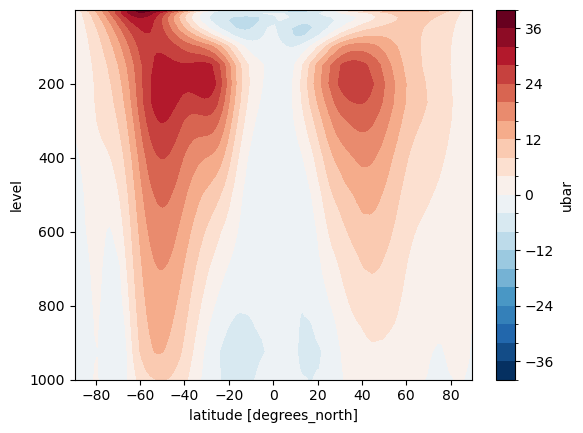

In [17]:
open159_ds.ubar.mean(('ens_ax', 'time')).plot.contourf(levels=21,  yincrease=False)

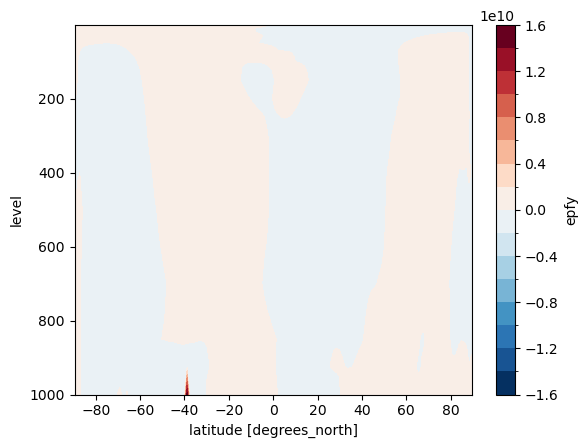

In [18]:
open159_ds.epfy.mean(('ens_ax', 'time')).plot.contourf(levels=21,  yincrease=False)

In [11]:
open159_efp_nh = ef.calculate_efp(open159_ds, data_type='pamip')
open159_efp_sh = ef.calculate_efp(open159_ds, data_type='pamip', calc_south_hemis=True)
print(f'NH: {open159_efp_nh}\nSH: {open159_efp_sh}')

NH: 0.0035
SH: 0.0019


In [ ]:
ds.to_netcdf(output_file)

# OpenIFS-159 
## epfy dataset (TEM)

In [23]:
open159_tem = xr.open_mfdataset(
    '/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC/epfy/OpenIFS-159/*.nc',
    chunks={'time': 31},
    combine='nested',
    concat_dim='ens_ax'
    )
open159_tem = open159_tem.sel(lon=0)
open159_tem

<xarray.Dataset> Size: 1GB
Dimensions:     (ens_ax: 300, time: 12, bnds: 2, level: 19, lat: 160)
Coordinates:
  * time        (time) datetime64[ns] 96B 2000-06-15T21:00:00 ... 2001-05-16T...
    lon         float64 8B 0.0
  * lat         (lat) float64 1kB -89.44 -88.31 -87.19 ... 87.19 88.31 89.44
  * level       (level) float64 152B 1e+03 925.0 850.0 700.0 ... 10.0 5.0 1.0
Dimensions without coordinates: ens_ax, bnds
Data variables: (12/15)
    time_bnds   (ens_ax, time, bnds) datetime64[ns] 58kB dask.array<chunksize=(1, 12, 2), meta=np.ndarray>
    va          (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    wa          (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    utendepfdy  (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    utendepfdz  (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    ta          (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    ...          ...
    psitem      (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    epfy        (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    epfz        (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    utendvtem   (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    utendwtem   (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    utendepfd   (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.5 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Mon Sep 21 10:59:14 2020: cdo monmean /p/largedata/hhb19/js...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.5 (http://mpimet.mpg.de/...

In [25]:
# Merge datasets and calculate divFy
open159_ds = xr.Dataset({'ubar': open159_tem.ua, 'epfy': open159_tem.epfy})
open159_ds = ef.calculate_divFphi(open159_ds)
open159_ds

<xarray.Dataset> Size: 263MB
Dimensions:  (time: 12, lat: 160, level: 19, ens_ax: 300)
Coordinates:
  * time     (time) datetime64[ns] 96B 2000-06-15T21:00:00 ... 2001-05-16T09:...
    lon      float64 8B 0.0
  * lat      (lat) float64 1kB -89.44 -88.31 -87.19 -86.06 ... 87.19 88.31 89.44
  * level    (level) float64 152B 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
Dimensions without coordinates: ens_ax
Data variables:
    ubar     (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    epfy     (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    divFy    (ens_ax, time, level, lat) float64 88MB 1.689e-06 ... 2.669e-11

In [26]:
open159_efp_nh = ef.calculate_efp(open159_ds, data_type='pamip')
open159_efp_sh = ef.calculate_efp(open159_ds, data_type='pamip', calc_south_hemis=True)
print(f'NH: {open159_efp_nh}\nSH: {open159_efp_sh}')

NH: 0.3279
SH: 0.3283


In [38]:
open159_ua.ua

<xarray.DataArray 'ua' (ens_ax: 300, time: 12, level: 19, lat: 160, lon: 320)> Size: 14GB
dask.array<concatenate, shape=(300, 12, 19, 160, 320), dtype=float32, chunksize=(1, 12, 19, 160, 320), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 96B 2000-06-15T21:00:00 ... 2001-05-16T09:...
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * lat      (lat) float64 1kB -89.44 -88.31 -87.19 -86.06 ... 87.19 88.31 89.44
  * level    (level) float64 152B 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
Dimensions without coordinates: ens_ax
Attributes:
    long_name:    U velocity
    units:        m s**-1
    code:         131
    table:        128
    institution:  ECMWF

In [39]:
open159_ds['u'] = open159_ua.ua
open159_ds

<xarray.Dataset> Size: 14GB
Dimensions:  (time: 12, lon: 320, lat: 160, level: 19, ens_ax: 300)
Coordinates:
  * time     (time) datetime64[ns] 96B 2000-06-15T21:00:00 ... 2001-05-16T09:...
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * lat      (lat) float64 1kB -89.44 -88.31 -87.19 -86.06 ... 87.19 88.31 89.44
  * level    (level) float64 152B 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
Dimensions without coordinates: ens_ax
Data variables:
    ubar     (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    epfy     (ens_ax, time, level, lat) float64 88MB dask.array<chunksize=(1, 12, 19, 160), meta=np.ndarray>
    divFy    (ens_ax, time, level, lat) float64 88MB 1.689e-06 ... 2.669e-11
    u        (ens_ax, time, level, lat, lon) float32 14GB dask.array<chunksize=(1, 12, 19, 160, 320), meta=np.ndarray>